In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter

from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.feature_selection import SelectFromModel

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
	
from sklearn.metrics import roc_auc_score

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


from sklearn.utils import resample

In [4]:
# load the dataset
df = pd.read_csv("E_Comm_Table_1.csv")

In [5]:
# look at the dataframe
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


In [6]:
# look at the numeric columns
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.221492
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.193869
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,146.000000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.000000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.000000
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,325.000000


In [7]:
# check for NAs
df.isna().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [8]:
# as there are not many NAs I will drop them from the dataframe
df = df.dropna()

In [9]:
# look at values in target 'Churn'
df.Churn.unique()

array([1, 0])

In [10]:
# identify target/split off target
X = df.drop('Churn', axis=1)
y = df.Churn

In [11]:
# target balance
df.Churn.value_counts(normalize=True)

0    0.832803
1    0.167197
Name: Churn, dtype: float64

In [12]:
# train test split
from sklearn.model_selection import train_test_split, cross_val_score, KFold
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [13]:
# create validation data
X_t, X_val, y_t, y_val = train_test_split(X_train, y_train, test_size = 0.20, random_state = 42)

In [14]:
# isolate numerical columns
X_t_num = X_t.select_dtypes(exclude='object')
X_t_num.shape

(2415, 14)

In [15]:
# scale numerical data
from sklearn.preprocessing import OneHotEncoder, StandardScaler
ss = StandardScaler()
X_t_sc = pd.DataFrame(ss.fit_transform(X_t_num), index= X_t_num.index, columns= X_t_num.columns)
X_t_sc.shape

(2415, 14)

In [16]:
# add in one hot encoded
ohe = OneHotEncoder(sparse= False, drop= 'first')

X_t_cat = X_t.select_dtypes(include= 'object')

#fit transform
X_t_oh = pd.DataFrame(ohe.fit_transform(X_t_cat), index= X_t_cat.index, columns=ohe.get_feature_names(X_t_cat.columns))
X_t_oh.shape

(2415, 16)

In [17]:
# merge databases
X_t_f = pd.merge(X_t_sc, X_t_oh, left_index=True, right_index=True)
X_t_f.shape

(2415, 30)

In [18]:
# smote
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_t_sm, y_t_sm = smote.fit_sample(X_t_f, y_t)

In [19]:
# isolate numerical columns
X_val_num = X_val.select_dtypes(exclude='object')
X_val_num.shape

(604, 14)

In [20]:
# scale numerical data
X_val_sc = pd.DataFrame(ss.transform(X_val_num), index= X_val_num.index, columns= X_val_num.columns)
X_val_sc.shape

(604, 14)

In [21]:
# one hot encoded

X_val_cat = X_val.select_dtypes(include= 'object')

# transform
X_val_oh = pd.DataFrame(ohe.transform(X_val_cat), index= X_val_cat.index, columns=ohe.get_feature_names(X_val_cat.columns))
X_val_oh.shape

(604, 16)

In [22]:
# merge databases
X_val_f = pd.merge(X_val_sc, X_val_oh, left_index=True, right_index=True)
X_val_f.shape

(604, 30)

In [23]:
from sklearn.linear_model import LogisticRegression

# instantiate model
lg = LogisticRegression()

# fit model
lg.fit(X_t_sm, y_t_sm)

# check accuracy on training data
lg.score(X_t_sm, y_t_sm)

0.8255234297108675

In [24]:
# validation testing
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.feature_selection import SelectFromModel

# set predictions
pred_lg_val = lg.predict(X_val_f)

# confusion matrix and classification report
print(confusion_matrix(y_val, pred_lg_val))
print(classification_report(y_val, pred_lg_val))

[[402  87]
 [ 25  90]]
              precision    recall  f1-score   support

           0       0.94      0.82      0.88       489
           1       0.51      0.78      0.62       115

    accuracy                           0.81       604
   macro avg       0.72      0.80      0.75       604
weighted avg       0.86      0.81      0.83       604



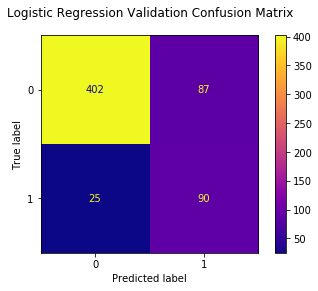

In [25]:
# plot confusion matrix
fig, ax = plt.subplots()

fig.suptitle("Logistic Regression Validation Confusion Matrix ")

plot_confusion_matrix(lg, X_val_f, y_val, ax=ax, cmap="plasma");

In [26]:
# instantiate model
svm = svm.SVC()

# fit model
svm.fit(X_t_sm, y_t_sm)

# check accuracy on training data
svm.score(X_t_sm, y_t_sm)

0.9623629112662014

In [27]:
# validation testing

# set predictions
pred_svm_val = svm.predict(X_val_f)

# confusion matrix and classification report
print(confusion_matrix(y_val, pred_svm_val))
print(classification_report(y_val, pred_svm_val))

[[446  43]
 [ 26  89]]
              precision    recall  f1-score   support

           0       0.94      0.91      0.93       489
           1       0.67      0.77      0.72       115

    accuracy                           0.89       604
   macro avg       0.81      0.84      0.82       604
weighted avg       0.89      0.89      0.89       604



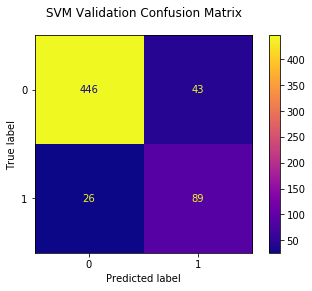

In [28]:
# plot confusion matrix
fig, ax = plt.subplots()

fig.suptitle("SVM Validation Confusion Matrix ")

plot_confusion_matrix(svm, X_val_f, y_val, ax=ax, cmap="plasma");

In [29]:
# instantiate model
rfm = RandomForestClassifier()

# fit model
rfm.fit(X_t_sm, y_t_sm)

# check accuracy
rfm.score(X_t_sm, y_t_sm)

1.0

In [30]:
# validation testing

# set predictions
pred_rfm_val = rfm.predict(X_val_f)

# confusion matrix and classification report
print(confusion_matrix(y_val, pred_rfm_val))
print(classification_report(y_val, pred_rfm_val))

[[477  12]
 [ 35  80]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       489
           1       0.87      0.70      0.77       115

    accuracy                           0.92       604
   macro avg       0.90      0.84      0.86       604
weighted avg       0.92      0.92      0.92       604



In [31]:
# adjust some hyper parameters to address overfitting

# instantiate model
rfm2 = RandomForestClassifier(n_estimators=50, max_depth=50, max_leaf_nodes=500)

# fit model
rfm2.fit(X_t_sm, y_t_sm)

# check accuracy on training data
rfm2.score(X_t_sm, y_t_sm)

1.0

In [32]:
# validation testing

# set predictions
pred_rfm2_val = rfm2.predict(X_val_f)

# confusion matrix and classification report
print(confusion_matrix(y_val, pred_rfm2_val))
print(classification_report(y_val, pred_rfm2_val))

[[476  13]
 [ 31  84]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       489
           1       0.87      0.73      0.79       115

    accuracy                           0.93       604
   macro avg       0.90      0.85      0.87       604
weighted avg       0.92      0.93      0.92       604



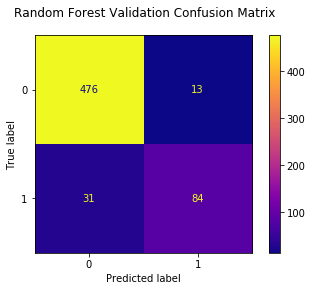

In [33]:
# plot confusion matrix
fig, ax = plt.subplots()

fig.suptitle("Random Forest Validation Confusion Matrix ")

plot_confusion_matrix(rfm2, X_val_f, y_val, ax=ax, cmap="plasma");

In [34]:
# instantiate model
knn = KNeighborsClassifier()
# fit model
knn = knn.fit(X_t_sm, y_t_sm)
# check accuracy
knn.score(X_t_sm, y_t_sm)

0.940677966101695

In [35]:
# validation testing

# set predictions
pred_knn_val = knn.predict(X_val_f)

# confusion matrix and classification report
print(confusion_matrix(y_val, pred_knn_val))
print(classification_report(y_val, pred_knn_val))

[[402  87]
 [  8 107]]
              precision    recall  f1-score   support

           0       0.98      0.82      0.89       489
           1       0.55      0.93      0.69       115

    accuracy                           0.84       604
   macro avg       0.77      0.88      0.79       604
weighted avg       0.90      0.84      0.86       604



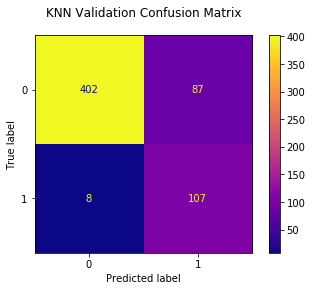

In [36]:
# plot confusion matrix
fig, ax = plt.subplots()

fig.suptitle("KNN Validation Confusion Matrix ")

plot_confusion_matrix(knn, X_val_f, y_val, ax=ax, cmap="plasma");

In [37]:
from sklearn.tree import DecisionTreeClassifier
# instantiate model
dtc = DecisionTreeClassifier()
# fit model
dtc = dtc.fit(X_t_sm, y_t_sm)
# check accuracy
dtc.score(X_t_sm, y_t_sm)

1.0

In [38]:
# validation testing

# set predictions
pred_dtc_val = dtc.predict(X_val_f)

# confusion matrix and classification report
print(confusion_matrix(y_val, pred_dtc_val))
print(classification_report(y_val, pred_dtc_val))

[[458  31]
 [ 34  81]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       489
           1       0.72      0.70      0.71       115

    accuracy                           0.89       604
   macro avg       0.83      0.82      0.82       604
weighted avg       0.89      0.89      0.89       604



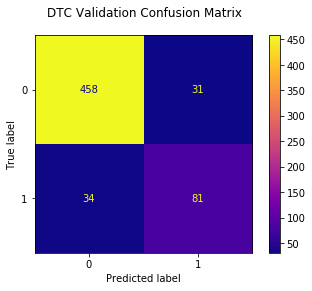

In [39]:
# plot confusion matrix
fig, ax = plt.subplots()

fig.suptitle("DTC Validation Confusion Matrix ")

plot_confusion_matrix(dtc, X_val_f, y_val, ax=ax, cmap="plasma");

In [40]:
from sklearn.naive_bayes import GaussianNB

# instantiate model
nbclf = GaussianNB()
# fit model
nbclf = nbclf.fit(X_t_sm, y_t_sm)
# check accuracy
nbclf.score(X_t_sm, y_t_sm)

0.5825024925224327

In [41]:
# validation testing

# set predictions
pred_nbclf_val = nbclf.predict(X_val_f)

# confusion matrix and classification report
print(confusion_matrix(y_val, pred_nbclf_val))
print(classification_report(y_val, pred_nbclf_val))

[[ 87 402]
 [  5 110]]
              precision    recall  f1-score   support

           0       0.95      0.18      0.30       489
           1       0.21      0.96      0.35       115

    accuracy                           0.33       604
   macro avg       0.58      0.57      0.33       604
weighted avg       0.81      0.33      0.31       604



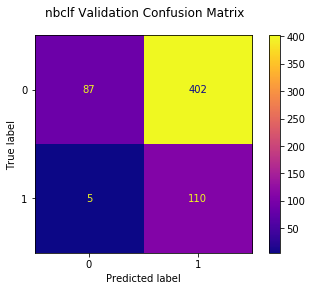

In [42]:
# plot confusion matrix
fig, ax = plt.subplots()

fig.suptitle("nbclf Validation Confusion Matrix ")

plot_confusion_matrix(nbclf, X_val_f, y_val, ax=ax, cmap="plasma");

In [43]:
from sklearn.ensemble import StackingClassifier

# Create Base Learners
base_learners = [
                 ('rfm2', RandomForestClassifier(n_estimators=10, random_state=42)),
                 ('knn', KNeighborsClassifier(n_neighbors=5)),
                 ('dtc', DecisionTreeClassifier())
                ]

# Initialize Stacking Classifier with the Meta Learner
clf = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression())

# fit model and check accuracy score
clf.fit(X_t_sm, y_t_sm).score(X_t_sm, y_t_sm)

0.9997507477567298

In [44]:
# validation testing

# set predictions
pred_clf_val = clf.predict(X_val_f)

# confusion matrix and classification report
print(confusion_matrix(y_val, pred_clf_val))
print(classification_report(y_val, pred_clf_val))

[[480   9]
 [ 26  89]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       489
           1       0.91      0.77      0.84       115

    accuracy                           0.94       604
   macro avg       0.93      0.88      0.90       604
weighted avg       0.94      0.94      0.94       604



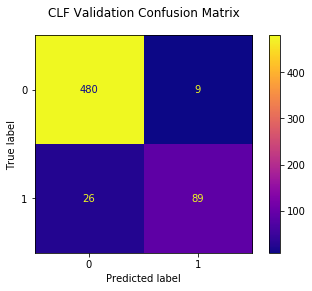

In [45]:
# plot confusion matrix
fig, ax = plt.subplots()

fig.suptitle("CLF Validation Confusion Matrix ")

plot_confusion_matrix(clf, X_val_f, y_val, ax=ax, cmap="plasma");

In [49]:
import xgboost as xgb
XGB_model=xgb.XGBClassifier(random_state=42,learning_rate=0.01)
XGB_model.fit(X_t_sm, y_t_sm)
# check accuracy
XGB_model.score(X_t_sm, y_t_sm)

0.8681455633100698

In [50]:
# validation testing

# set predictions
pred_XGB_model_val = XGB_model.predict(X_val_f)

# confusion matrix and classification report
print(confusion_matrix(y_val, pred_XGB_model_val))
print(classification_report(y_val, pred_XGB_model_val))

[[433  56]
 [ 35  80]]
              precision    recall  f1-score   support

           0       0.93      0.89      0.90       489
           1       0.59      0.70      0.64       115

    accuracy                           0.85       604
   macro avg       0.76      0.79      0.77       604
weighted avg       0.86      0.85      0.85       604



In [51]:
# isolate numerical columns
X_train_num = X_train.select_dtypes(exclude='object')
X_train_num.shape

(3019, 14)

In [52]:
# scale numerical data
ss_f = StandardScaler()

X_train_sc = pd.DataFrame(ss_f.fit_transform(X_train_num), index= X_train_num.index, columns= X_train_num.columns)
X_train_sc.shape

(3019, 14)

In [53]:
# one hot encode
ohe_f = OneHotEncoder(sparse= False, handle_unknown='ignore')

X_train_cat = X_train.select_dtypes(include= 'object')

#fit transform
X_train_oh = pd.DataFrame(ohe_f.fit_transform(X_train_cat), index= X_train_cat.index, columns=ohe_f.get_feature_names(X_train_cat.columns))
X_train_oh.shape

(3019, 21)

In [54]:
# merge databases
X_train_f = pd.merge(X_train_sc, X_train_oh, left_index=True, right_index=True)
X_train_f.shape

(3019, 35)

In [55]:
# smote
sm_f = SMOTE()

X_train_sm, y_train_sm = smote.fit_sample(X_train_f, y_train)

In [56]:
# isolate numerical columns
X_test_num = X_test.select_dtypes(exclude='object')

X_test_num.shape

(755, 14)

In [57]:
# scale numerical data
X_test_sc = pd.DataFrame(ss_f.transform(X_test_num), index= X_test_num.index, columns= X_test_num.columns)

X_test_sc.shape

(755, 14)

In [58]:
# one hot encode

X_test_cat = X_test.select_dtypes(include= 'object')

X_test_oh = pd.DataFrame(ohe_f.transform(X_test_cat), index= X_test_cat.index, columns=ohe_f.get_feature_names(X_test_cat.columns))

In [59]:
# merge databases
X_test_f = pd.merge(X_test_sc, X_test_oh, left_index=True, right_index=True)
X_test_f.shape

(755, 35)

In [60]:
X_test_f.head()

,CustomerID,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,...,Gender_Male,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
178,-1.789099,-0.610433,1.391318,-0.329268,0.015262,-1.720102,-0.751625,0.292397,-0.622421,-1.307272,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5627,1.622132,-0.998492,-0.749008,-0.565051,0.015262,-1.720102,0.688195,-0.481942,1.606629,1.447425,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4136,0.688723,-0.093020,1.391318,2.264342,1.411490,1.197853,-0.031715,-0.481942,-0.622421,1.722895,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2348,-0.430617,-1.127846,-0.749008,-1.036616,-1.380966,-0.747450,-1.471536,0.292397,-0.622421,-1.307272,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
642,-1.498622,0.165687,-0.749008,-0.800834,-1.380966,-0.747450,0.688195,-0.094772,-0.622421,-0.205393,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [61]:
# fit model
clf = clf.fit(X_train_sm, y_train_sm)
# check accuracy
clf.score(X_train_sm, y_train_sm)

1.0

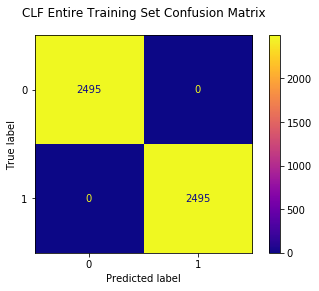

In [62]:
# plot confusion matrix
fig, ax = plt.subplots()

fig.suptitle("CLF Entire Training Set Confusion Matrix ")

plot_confusion_matrix(clf, X_train_sm, y_train_sm, ax=ax, cmap="plasma");

In [63]:
clf.score(X_test_f, y_test)

0.9576158940397351

In [64]:
# set predictions
pred_clf_test = clf.predict(X_test_f)

# confusion matrix and classification report
print(confusion_matrix(y_test, pred_clf_test))
print(classification_report(y_test, pred_clf_test))

[[637  11]
 [ 21  86]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       648
           1       0.89      0.80      0.84       107

    accuracy                           0.96       755
   macro avg       0.93      0.89      0.91       755
weighted avg       0.96      0.96      0.96       755



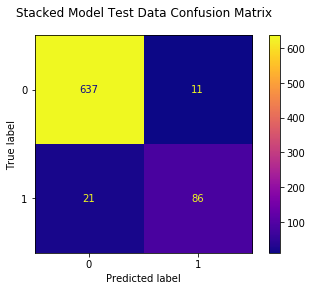

In [66]:
# plot confusion matrix
fig, ax = plt.subplots()

fig.suptitle("Stacked Model Test Data Confusion Matrix ")

plot_confusion_matrix(clf, X_test_f, y_test, ax=ax, cmap="plasma");
#plt.savefig('../reports/figures/stacked.png', transparent=True);

In [67]:
# create correlations for plotting correlation to target "Attrition"
corr = df.corr().Churn
corr

CustomerID                     0.031617
Churn                          1.000000
Tenure                        -0.340013
CityTier                       0.073858
WarehouseToHome                0.087318
HourSpendOnApp                 0.060845
NumberOfDeviceRegistered       0.149041
SatisfactionScore              0.095759
NumberOfAddress                0.076336
Complain                       0.238137
OrderAmountHikeFromlastYear    0.017193
CouponUsed                     0.010982
OrderCount                    -0.001962
DaySinceLastOrder             -0.139254
CashbackAmount                -0.058866
Name: Churn, dtype: float64

['Tenure', 'Complain', 'Numberofdeviceregistered', 'Daysincelastorder', 'Satisfactionscore']
[34.001288379447104, 23.813730782624013, 14.904124329206853, 13.925407645317428, 9.575910418945778]


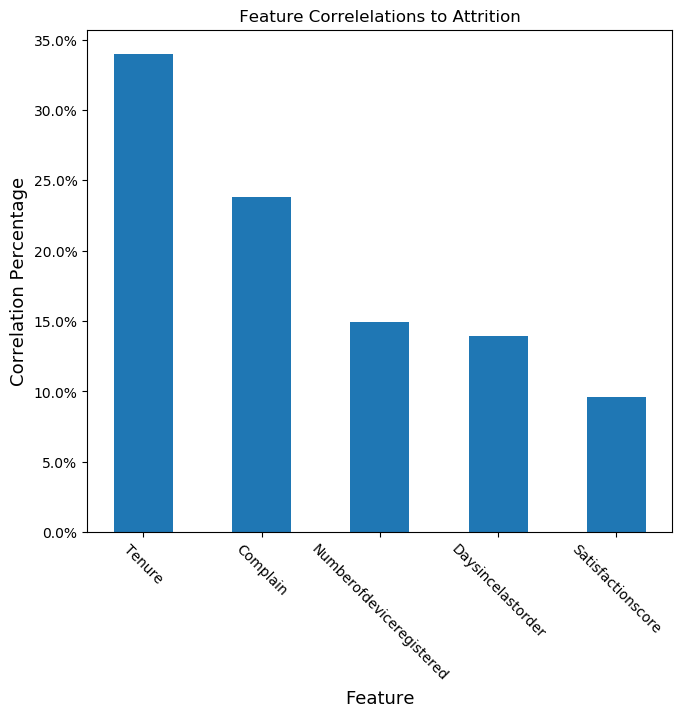

In [70]:
# function to plot feature correlations
def create_plot_of_feature_importances(coeff_dict, top_num=10, figsize=(7, 6), title='Feature Importances', xlabel='Feature', ylabel='Correlation Percentage', append_title='', prepend_title='', width=0.8, xrot=0, bar_colors=None, percent=None, save_path=None):
    ''' 
    Inputs: 
    
    model: A trained ensemble model instance
    X: a dataframe of the features used to train the model
    '''
    dict_keys = [key for key in coeff_dict.keys()]
    dict_values = [abs(value) for value in coeff_dict.values()]
    
    coeff_dict = {dict_keys[x]: dict_values[x] for x in range(len(dict_values))}
    coeff_dict = dict(list(coeff_dict.items())[:])
    features_and_importances = zip(coeff_dict.keys(), coeff_dict.values())
    features_and_importances = sorted(features_and_importances, key = lambda x: x[1], reverse=True)
    
    features = [i[0].title() for i in features_and_importances[1:top_num+1]]
    print(features)
    importances = [abs(i[1])*100 for i in features_and_importances[1:top_num+1]]
    print(importances)
    plt.rcdefaults()
    fig, ax = plt.subplots(figsize=figsize)
#     width = .35
    plt.bar(features, importances, width=width, color=bar_colors)
    if percent:
        ax.yaxis.set_major_formatter(PercentFormatter())
#     plt.gca().invert_yaxis()
    title = ' '.join([prepend_title, title, append_title])
    plt.title(title)
    plt.xlabel('Feature', fontsize=13)
    plt.ylabel(ylabel, fontsize=13)
    plt.xticks(rotation=xrot)
    plt.axis('tight')
    plt.tight_layout()
    if save_path:
        plt.savefig(save_path, transparent=True)
min_percent = 0.12
corr = df.corr().Churn
corr=dict(corr)
create_plot_of_feature_importances(corr, title='Feature Correlelations to Attrition', top_num=5, width=0.5, percent=True)
plt.xticks(rotation=-45);
#plt.savefig('../reports/figures/corrs.png', transparent=True);

Text(0.5, 0, 'Tenjure')

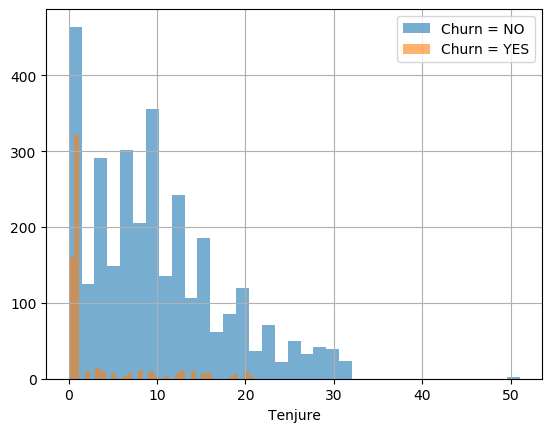

In [71]:
# plot attrition by Tenure
df[df["Churn"] == 0]['Tenure'].hist(bins=35,label='Churn = NO', alpha=0.6)
df[df["Churn"] == 1]['Tenure'].hist(bins=35, label='Churn = YES', alpha=0.6)
plt.legend()
plt.xlabel('Tenjure')
#plt.savefig('../reports/figures/age_dist.png', transparent=True);